# Coursework #2 AI for Sustainable Development

## Coursework overview
Coursework #2 is a data analysis coding-based coursework. You are asked to choose a dataset related to sustainable development and do some machine learning based analysis. We will detail this more in the next sections.

You can choose an application/dataset from the ones we analysed in the first coursework or choose a completely new dataset: 
* **Option 1**: Choose a dataset from the SustainBench paper (which includes 15 datasets related to sustainable development). There is no restriction regarding the dataset, you can even choose the same dataset that you use in coursework #1. Please note that the authors from SustainBench have a GitHub project with data loaders, preprocessing code and baselines for these datasets here: https://github.com/sustainlab-group/sustainbench
* **Option 2**: Choose an alternative dataset of your choice (that you are interested in or that you plan on working on for your MSc dissertation). Please if you choose this option motivate the dataset's relationship to sustainable development. 

Once you have chosen your dataset we will ask you to do the following: 
1. Do some **exploratory data analysis** to get some insights about the dataset. We do not give specific guidelines here as this may depend on the dataset itself, but we ask you to justify your choices and the results of your analysis.
2. Think about the **task that the dataset is most suitable for** and discuss what would be the most **appropriate evaluation criteria** for such a machine learning task. For example, you may have a dataset where songs are labelled with different music genres. Perhaps the task for which the dataset is most suitable for is to build a multi label prediction model that can classify new songs, and the most appropriate evaluation metric could be the hamming loss (commonly used in multi label prediction, which could be used both as inspiration for a training objective for neural networks, or simply as the evaluation criteria for model selection and hyperparameter tuning). 
3. **Design and implement a machine learning system/pipeline**. This could be either supervised or unsupervised. 
4. **Design a set of experiments** and discuss how these fit with the questions that the dataset aims to address. Do a **performance & scalability analysis** of your model.
5. Discuss/analyse the **ethical implications**, in connection with your exploratory data analysis and model performance (e.g. do you appreciate any imbalances in the data or initial biases that can be problematic?).
6. Discuss **sustainable development relevance & impact**.

We ask your code to be in python, but beyond that we do not mind what packages you use. 

For grading, we will not check your code in depth (beyond perhaps checking that it's doing what you describe). Instead, our focus will be on grading the analysis you have done, how well it's motivated and justified, how insightful it was, how do you interpret the results in terms of impact and sustainable development, etc.

**Submission**: You do not have to submit your dataset and notebook to the coursework submission. Simply run the analysis in jupyter notebooks and then export the notebook as html or pdf. You can submit this html/pdf file in moodle. 

### Previous work (5%)

**Guidelines**: We first ask you to summarise what has been done before with this dataset. While this is not specifically necessary for the purpose of the coursework, it is important for us to mark the novelty of your analysis, specially since many of these datasets come with associated baselines in the GitHub link we shared before. While we encourage you to compare to what has been done before we will evaluate whether you explored new approaches. Please give us in this section a brief introduction to the dataset and to the previous models that were built before using the data (you do not need to go over all models that were proposed before, you can just focus on the one with the best performance). Tell us whether these models were publicly available, and if so where to find them. It is crucial that in the next sections you justify how your analysis differs from this previous work.

<span style='color:red'> **[To be completed by you]** </span>


 

We aim to predict crop yields using time series remote sensing data of farmland. By using this data, we hope to get an accurate estimate of the potential crop yield for that year.

According to the leaderboard on sustainbench, the previous best performing model is a model by You et al [1] (0.37 t/h RMSE on USA data). This model combines a convolutional neural network with Gaussian Processes. The idea is that since each datapoint is a full timeseries for a particular area, there is no need to predict the next step (so no need for time series models), instead a model that can observe the patterns in the time series performs better. Then by making the assumption that regions that are close to each other are somewhat correlated, they correct errors with GPs for datapoints that are close by. This means they achieve the best perfromance by using the metadata about the precise location of each datapoint.
The model is publicly available at https://github.com/gabrieltseng/pycrop-yield-prediction (not published by original author). 
Another model by Wang et al. (2018) uses transfer learning with LSTM architectures on this data to determine crop yields trained on Argentina data transfered on Brazil data to obtain a 0.42 t/h RMSE. For quick comparison, the mean label is around 2.8 t/h.

### Exploratory data analysis (15%)

**Guidelines**: Load the dataset and answer the following questions: 
* What are the characteristics of your dataset? Are there any trends in the data? (5%)
* Are there any challenges with the data? (missing values, outliers, imbalanced classes, biases, etc...) (5%)
* Does the data need any pre-processing to successfully apply standard machine learning models? If so, what kind? Please do the pre-processing that you consider necessary. (5%)

You can use descriptive statistics here, figures/plots, etc. 


<span style='color:red'> **[Your insights go here. To be completed by you]** </span>

Characteristics: Each datapoint is a collection of histograms of pixel colours aranged in a time series in a certain region and year. The histograms are extracted from satellite imagery where each image has the pixel colours binned. There are 9 different bands, 32 timesteps and 32 pixel colour bins so each datapoint is $32\times32\times9$ dimensional. There are 3 countries in the dataset: USA, Argentina, Brazil. 

In [1]:
# your code here!
# load relevant packages, load your dataset, start your analysis
# you can have as many code cells as needed 
import numpy as np
import os
import pandas as pd
import glob
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from scipy.stats import norm

In [2]:
# we will be doing exloratory data analysis on the USA training set: no peeking at the test set!
data_dir = os.path.join('soybeans')
X = np.load(os.path.join(data_dir, 'usa', 'train_hists.npz'), allow_pickle=True)['data']
y = np.load(os.path.join(data_dir, 'usa', 'train_yields.npz'), allow_pickle=True)['data']
X.shape, y.shape

((5792, 32, 32, 9), (5792,))

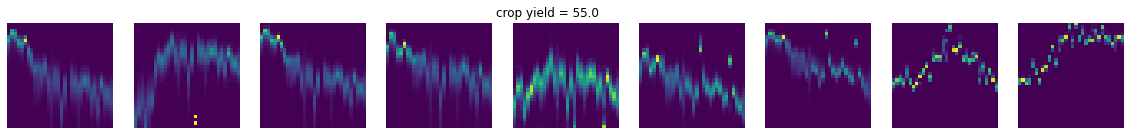

In [3]:
# lets have a look at the histograms in different bands for the first datapoint, we want to see the data
plt.figure(figsize=(20,2))
for i in range(9):
    plt.subplot(1, 9, i+1)
    plt.imshow(X[0,:,:,i]) 
    plt.axis('off')
plt.suptitle('crop yield = {}'.format(y[0]));

Time is on the x-axis and histogram bins on the y-axis.

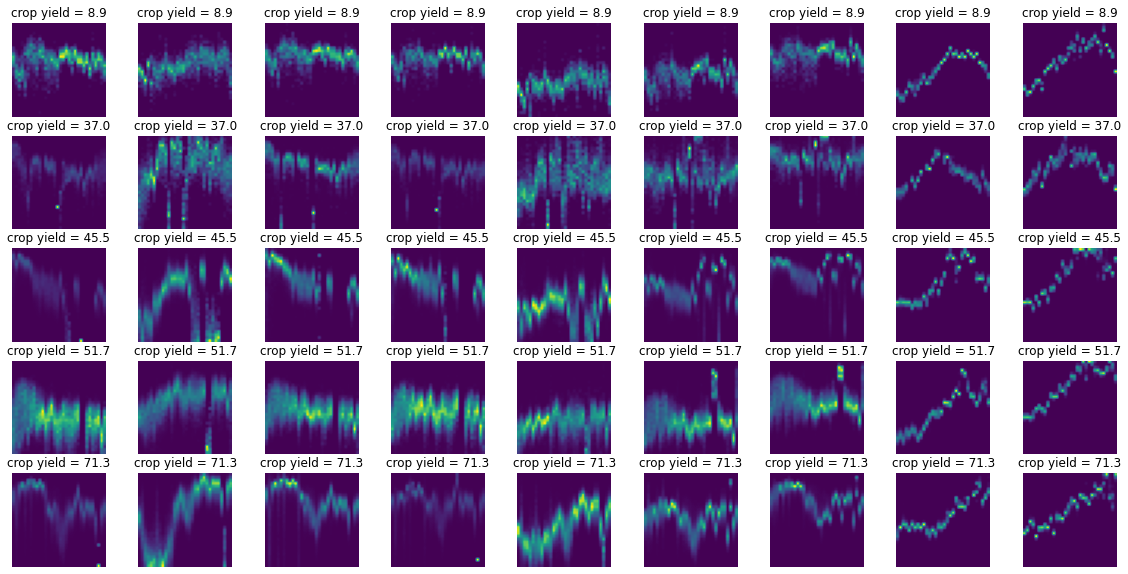

In [4]:
# lets compare 5 different datapoints with different labels just to get a general idea of what we're dealing with

# we want to show the two extremes (min/max), median, and quartiles: 5 images
sort_masky = np.argsort(y)
sort_maskx = np.expand_dims(sort_masky, axis=(1,2,3))
sorted_X = np.take_along_axis(X, sort_maskx, axis=0)

plt.figure(figsize=(20,10))
j = 0
for n in range(5):
    for i in range(9):
        plt.subplot(5, 9, j+1)
        ind = int(n/4 * (X.shape[0]-1))
        plt.imshow(sorted_X[ind,:,:,i])
        j += 1
        plt.axis('off')
        plt.title('crop yield = {}'.format(np.take_along_axis(y, sort_masky, axis=0)[ind]));

Challenges: We can see in the images above that it is not immediately clear what features of the bands lead to good yields. This is because the plots seem quite different regardless of the yield and there is no clear evolution in the way the plots look. For example, looking at the first band (left-most column), the plot that gives the worst yield (8.9 bushels/acre) seems comparable to the 3rd quartile plot (51.7 b/a), the median plot (45.5 b/a) looks like the maximum yield plot (71.3 b/a) in this column as well. The human eye seems to have trouble to pick up features: a neural network would to be a good potential model because it learns a hidden representation. 

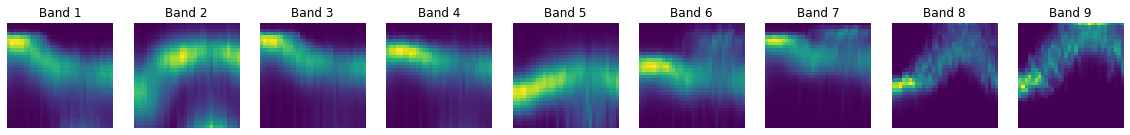

In [5]:
# lets look at the average image for each band
plt.figure(figsize=(20,2))
for i in range(9):
    plt.subplot(1, 9, i+1)
    plt.imshow(np.mean(X[:,:,:,i], axis=0))
    plt.axis('off')
    plt.title('Band {}'.format(i+1));

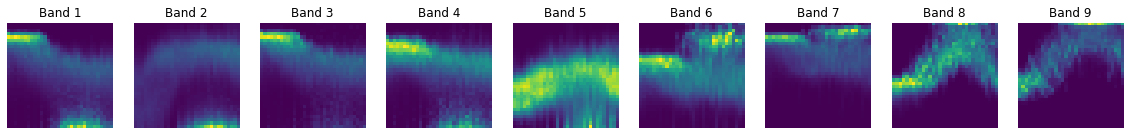

In [6]:
# now variance for each band
plt.figure(figsize=(20,2))
for i in range(9):
    plt.subplot(1, 9, i+1)
    plt.imshow(np.var(X[:,:,:,i], axis=0))
    plt.axis('off')
    plt.title('Band {}'.format(i+1));

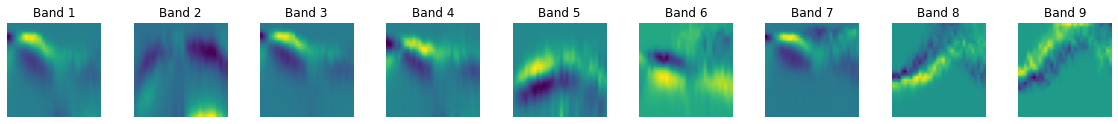

In [7]:
# eigenimages: the first component that represents most of the data
plt.figure(figsize=(20,10))
for i in range(9):
    pca = PCA(n_components=0.9, whiten=False).fit(X[:,:,:,i].reshape(-1, 32*32))
    plt.subplot(5, 9, 1+i)
    plt.imshow(pca.components_[0].reshape(32,32))
    plt.axis('off')
    plt.title('Band {}'.format(i+1));

There are a few important areas in each band that have the highest variance. These are most likely the regions that we will use to predict the labels. Some bands show more variance than others. We can see that in bands 1-4 and 6 the variance is concentrated in very specific areas. The features are hard to interpret here: it seems that the yields depend on many factors at different time steps.

usa mean:  44.157 || Standard dev:  10.401
arg mean:  2.596 || Standard dev:  0.829
bra mean:  2.734 || Standard dev:  0.52


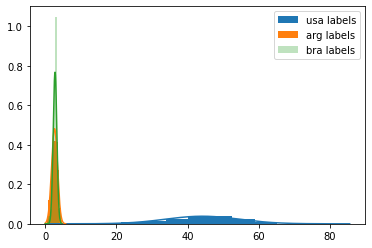

In [8]:
# we've looked at the features, lets explore the labels
def labels_hist(y, country, alpha=1):
    x = np.linspace(0, 1.2*max(y), 1000)
    l = plt.plot(x, norm.pdf(x, y.mean(), y.std()))
    
    h = plt.hist(y, density=True, label= country+' labels', alpha=alpha, color=l[-1].get_color())
    
    print(country, 'mean: ', round(y.mean(),3), '|| Standard dev: ', round(y.std(), 3))
    plt.legend()
    plt.show;
    
# we noticed during exploration that the features look similar across countries (not shown) but the labels are very different
plt.figure()
y_arg = np.load(os.path.join(data_dir, 'argentina', 'train_yields.npz'), allow_pickle=True)['data']
y_bra = np.load(os.path.join(data_dir, 'brazil', 'train_yields.npz'), allow_pickle=True)['data']
y_usa = np.load(os.path.join(data_dir, 'usa', 'train_yields.npz'), allow_pickle=True)['data']
labels_hist(y_usa, 'usa')
labels_hist(y_arg, 'arg')
labels_hist(y_bra, 'bra', alpha=0.3)

Here, we can see that the labels are very different for the different countries: they are not in the same units despite the information on Sustainbench, the USA data is in bushels/acre and the South American data is in tonnes per hectare. We can find online the conversion rate for soybeans from bushel to tonne and for acre to hectare
### Conversion (pre-processsing) 
we have bushels/acre, we want tonnes/hectare

soybeans: 36.7440 bushels/ton: https://www.agric.gov.ab.ca/app19/calc/crop/bushel2tonne.jsp <br>
2.47105 acre/hectare: https://www.unitconverters.net/area/acres-to-hectare.htm <br>
bushels/acre /36.7440 *2.47105 = tonnes/hectare <br>
So the formula is: b/a * 0.06725043544524276 $\to$ t/h 

usa mean:  2.97 || Standard dev:  0.699
arg mean:  2.596 || Standard dev:  0.829
bra mean:  2.734 || Standard dev:  0.52


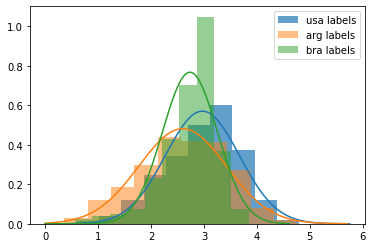

In [9]:
# lets save this in a variable
conversion_constant =  0.06725043544524276
labels_hist(y_usa*conversion_constant, 'usa', alpha=0.7)
labels_hist(y_arg, 'arg', alpha=0.5)
labels_hist(y_bra, 'bra', alpha=0.5)

We get values in the same range as the South American countries so our conversion seems correct: we will stay in the metric sysyem (t/h) as this is how the models are evaluated on sustainbench. The yields for each country almost follows a normal distribution, there are no outliers. We also notice that the USA on average has better yields than the South American countries: this is sensible as it is a richer country so better equipment will be available: how developed a country is, affects the yield.

### Task and evaluation (10%)

**Guidelines**: Tell us a bit about the main task that in your view this dataset could help solve and propose and justify the evaluation criteria that would be important here, not only considering the task but your exploratory data analysis. For example, if you found that there is class imbalance in the dataset and that the most important class is the minority one, you may want to add costs in your evaluation metric to account for it, or maybe you want to use a metric specifically suited for imbalanced classification.

<span style='color:red'> **[To be completed by you]** </span>


The point of the dataset is to predict crop yield for each datapoint. Each datapoint is a time series of histogram of pixel values of a satellite image for a certain region (histogram on the vertical axis and time on the horizontal axis). We want to be as close as possible to the exact yield to prepare for eventual excess yield or more importantly, a bad yield, for each datapoint. We have labels on a continuous scale, and we want to be as close as possible to this label for each datapoint: this is a regression task. An MSE loss is the most appropriate in this case. Also, if we want to compare with the benchmark results (RMSE), we have to use MSE then root square it. 

From the data analysis, we can see that the human eye is not very effective at seeing any patterns in the data so the safest thing to do is let a neural network do the work of finding the correct features. Also, from the data analysis, we can see that the colours on the plots don't seem to correlate with the yield amount. We can assume that the values and the position of the pixels is less important than the evolution of the pixel distributions: a convolutional network or LSTM might be more appropriate than a linear network. 

We have to make sure to convert the labels as different units for the labels will obviously give us very bad results. Our goal is to do transfer learning on the different countries by making the assumption that the same features determine a good yield from country to country. We will train on the USA data first as it is the largest dataset.

There are no obvious outliers in the labels, and the exploratory data analysis has not revealed any obvious missing data (missing time step in a histogram for example) in the features but this is much harder to check due to these histograms being an unusual way to present data. The data seems very clean with no preprocessing required (except for unit conversion).

### Design and build an ML system (20%)

**Guidelines**: Taking into account the task and evaluation criteria set in the previous section design and build now an ML system. If you go for supervised learning, you could start by partiting your dataset in train and test here and try a model on the dataset. But please justify your choices in each case. Why did you choose a specific ML model? Why is it relevant for the task and dataset at hand? Do you envision any challenges with the use of such model? 

Again, we do not ask for a specific model to be used. Instead, we will evaluate the depth and appropriatedness of your analysis. As this section (and some of the following ones) are more open ended we do not specify marks for each question.


***
Please note that if the dataset of your choice is too large to work with, you can simply choose a subset of it. We will not substract any marks for doing so. 
***


We will train 3 different networks architectures: linear, convolutional and Long Short Term Memory (LSTM). This follows the work in You et al. but adding a linear network in the mix: the images and bands are all flattened in a $32\times32\times9$ vectors. We will then use linear regression to average out the prediction as an ensemble method. The idea being that each of the networks provide a different kind of information. 

In [10]:
# your model building code goes here
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
import itertools
from tqdm import tqdm
import time
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

device

device(type='cuda')

In [29]:
# Prediction models

# linear network
class linnet(nn.Module):
    def __init__(self):
        super().__init__()
        # 5 linear layers with relu non linearity
        self.linear = nn.Sequential(nn.Linear(32*32*9, 32*32), nn.ReLU(), 
                                    nn.Linear(32*32, 32), nn.ReLU(),
                                    nn.Linear(32, 10), nn.ReLU(),
                                    nn.Linear(10, 10), nn.ReLU(),
                                    nn.Linear(10,1)
                                   )
        
    def forward(self, x):
        # flatten the data into a vector 
        vector = x.view(-1, 32*32*9)
        # pass through layers
        lin_out = self.linear(vector)
        return lin_out

# convolutional network
class convnet(nn.Module):
    def __init__(self):
        super().__init__()
        # 4 convolutional layers with leaky relu non linearity
        self.conv = nn.Sequential(nn.Conv2d(9, 36, 4, 2), nn.LeakyReLU(),
                                  nn.Conv2d(36, 72, 4, 2), nn.LeakyReLU(),
                                  nn.Conv2d(72, 144, 3, 2),nn.LeakyReLU(), 
                                  nn.Conv2d(144, 200, 2, 1)
                                 )
        # 3 output linear layers with relu activation
        self.linconv = nn.Sequential(nn.Linear(200,200),nn.ReLU(),
                                     nn.Linear(200,100), nn.ReLU(),
                                     nn.Linear(100,1)
                                 )
        
    def forward(self, x):
        # change (-1, 9, 32, 32) to (-1, 32, 32, 9)
        image = x.swapaxes(1,3)
        # pass through layers
        conv_out = self.conv(image) # output: (-1, 200, 1, 1)
        image_out = self.linconv(conv_out.view(-1, 200))
        return image_out

class lstm(nn.Module):
    def __init__(self):
        super().__init__()
        # one lstm cell
        self.lstm = nn.LSTMCell(32*9, 32)
        # linear output
        self.linear = nn.Sequential(nn.Linear(32*32, 500), nn.ReLU(),
                                    nn.Linear(500, 100), nn.ReLU(),
                                    nn.Linear(100, 32), nn.ReLU(),
                                    nn.Linear(32,16), nn.ReLU(), 
                                    nn.Linear(16,1))
        
    def forward(self, x):
        # line up the time series data and bands to get (-1, 9*32) histogram vectors for each time step
        x1 = x.swapaxes(1,3)
        x2 = x1.swapaxes(2,3)
        x3 = x2.reshape(-1, 9*32, 32)
        
        hx = torch.randn(x.shape[0], 32).to(device) # (batch, hidden_size)
        cx = torch.randn(x.shape[0], 32).to(device)

        output = []
        #loop through time steps
        for i in range(x.shape[2]): # 32 timesteps
            hx, cx = self.lstm(x3[:,:,i], (hx,cx))
            output.append(hx)
        # pass through layers
        out = torch.stack(output, dim=0).swapaxes(0,1).reshape(-1, 32*32)
        return self.linear(out)

# ensemble linear regression output with both training and testing functionalities
def ensemble(net1, net2, net3, X, y, theta=None):
    
    x1, x2, x3 = net1(X).cpu(), net2(X).cpu(), net3(X).cpu() # each feature is the prediction of each network
    features = torch.hstack((x1,x2,x3)) # we stack the features
    if theta==None:
        theta = torch.linalg.inv(features.T @ features)@features.T@ y.cpu()
    rmse = nn.MSELoss()(theta@features.T, y.cpu()).sqrt()
    print('RMSE: ', rmse.detach())
    return theta

In [12]:
# UTILS

# we want to batch to prevent overfitting
class data(Dataset):
    def __init__(self, X, Y):
        self.X = X
        self.Y = Y

    def __len__(self):
        return len(self.X)

    def __getitem__(self, index):
        _x = self.X[index]
        _y = self.Y[index]
        return _x, _y

# we create a train model function with validation loss and stopping criterion
def train_model(net, epochs, Xtr, ytr, Xval, yval, batchs=20):
    # timer
    start = time.time()
    
    # we make a dataloader from our class and torch.utils
    dataloader = DataLoader(data(Xtr, ytr), batch_size=batchs, shuffle=True)
    
    # we chose adam with scheduler as the loss gets very noisy otherwise
    opt = torch.optim.Adam(net.parameters())
    scheduler = torch.optim.lr_scheduler.StepLR(opt, step_size=20, gamma=0.2)
    
    # lists to save losses for plotting
    losses = []
    valid_loss = []
    
    # we loop through epochs
    for epoch in range(epochs):
        epoch_loss = 0.
        
        # batched forward+back pass
        for xt, yt in dataloader:
            opt.zero_grad()
            yhat = net(xt)
            loss = nn.MSELoss()(yhat.squeeze(), yt)
            loss.backward()
            opt.step()
            epoch_loss += loss.item() * xt.shape[0]/X.shape[0]
        scheduler.step()
        losses.append(epoch_loss)
        
        # epoch information
        if epoch%(epochs/10)==0:
            print('Epoch %d, train loss = %0.4e' % (epoch, epoch_loss))
        
        # validation loss
        with torch.no_grad():
            yhatv = net(Xval)
            loss = nn.MSELoss()(yhatv.squeeze(), yval)
            valid_loss.append(loss.item())
            
        # stopping criterion: converged loss for 2 epochs in a row
        if len(losses) > 10 and losses[-2]==losses[-1]: #and losses[-2]==losses[-3]:
            print('Converged in {} epochs'.format(epoch))
            print('Time: %.2f mins' %((time.time()-start)/60))
            break
            
    # plotting
    plt.figure()
    plt.title('network loss')
    plt.plot(np.log(losses), label='train')
    plt.plot(np.log(valid_loss), label='valid')
    plt.ylabel('log MSE')
    plt.xlabel('Epoch')
    plt.legend()
    plt.show()
    print('Time: %.2f mins' %((time.time()-start)/60))
    
    print('Training RMSE: %.4f || Validation RMSE: %.4f' % (np.sqrt(losses[-1]), np.sqrt(valid_loss[-1])))
    
    return losses, valid_loss

In [13]:
# We import the validation set: no touching the test set until test time!
Xvalid = np.load(os.path.join(data_dir,'usa', 'dev_hists.npz'), allow_pickle=True)['data']
yvalid = np.load(os.path.join(data_dir,'usa', 'dev_yields.npz'), allow_pickle=True)['data']

# lets stay in the metirc system, and convert to torch and cuda
Xv, yv = torch.Tensor(Xvalid).to(device), torch.Tensor(yvalid*conversion_constant).to(device)
Xtr, ytr = torch.Tensor(X).to(device), torch.Tensor(y*conversion_constant).to(device)

# check the shapes are correct
Xv.shape, yv.shape, Xtr.shape, ytr.shape

(torch.Size([1448, 32, 32, 9]),
 torch.Size([1448]),
 torch.Size([5792, 32, 32, 9]),
 torch.Size([5792]))

### Linear network

Epoch 0, train loss = 5.4529e-01
Epoch 20, train loss = 1.4103e-02
Epoch 40, train loss = 4.1859e-03
Epoch 60, train loss = 2.2961e-03
Epoch 80, train loss = 1.9344e-03
Epoch 100, train loss = 1.8663e-03
Epoch 120, train loss = 1.8506e-03
Epoch 140, train loss = 1.8474e-03
Epoch 160, train loss = 1.8477e-03
Epoch 180, train loss = 1.8476e-03


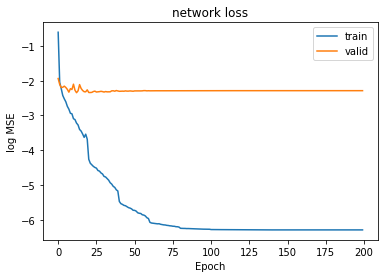

Time: 4.47 mins
Training RMSE: 0.0430 || Validation RMSE: 0.3186


In [14]:
# we initialise our network
net_lin = linnet().to(device)
epochs = 200
# we train
t_lin, v_lin = train_model(net_lin, epochs, Xtr, ytr, Xv, yv)

### Convolutional network

Epoch 0, train loss = 7.3096e-01
Epoch 20, train loss = 1.1416e-02
Epoch 40, train loss = 8.5704e-04
Epoch 60, train loss = 8.0649e-05
Epoch 80, train loss = 2.7349e-05
Epoch 100, train loss = 2.1364e-05
Epoch 120, train loss = 2.0397e-05
Epoch 140, train loss = 2.0184e-05
Epoch 160, train loss = 2.0164e-05
Epoch 180, train loss = 2.0164e-05


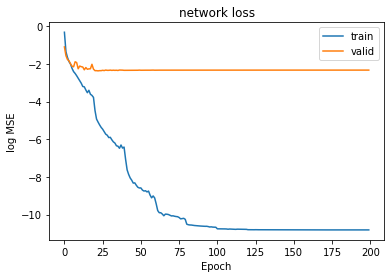

Time: 4.13 mins
Training RMSE: 0.0045 || Validation RMSE: 0.3128


In [15]:
# we initialise our network
net_conv = convnet().to(device)
epochs = 200
# we train
t_conv, v_conv = train_model(net_conv, epochs, Xtr, ytr, Xv, yv)

### LSTM Network

Epoch 0, train loss = 7.5649e-01
Epoch 20, train loss = 5.2284e-02
Epoch 40, train loss = 3.0849e-02
Epoch 60, train loss = 2.5674e-02
Epoch 80, train loss = 2.4485e-02
Epoch 100, train loss = 2.4235e-02
Epoch 120, train loss = 2.4330e-02
Epoch 140, train loss = 2.4357e-02
Epoch 160, train loss = 2.4405e-02
Epoch 180, train loss = 2.4338e-02


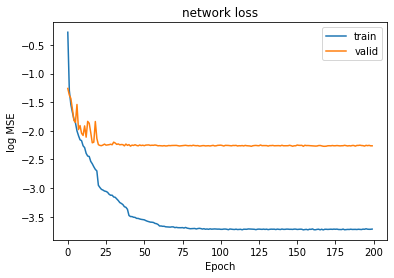

Time: 13.09 mins
Training RMSE: 0.1560 || Validation RMSE: 0.3227


In [16]:
# we initialise our network
net_lstm = lstm().to(device)
epochs = 200
# we train
t_lstm, v_lstm = train_model(net_lstm, epochs, Xtr, ytr, Xv, yv)

### Ensemble

In [30]:
# Ensemble method
theta = ensemble(net_lin, net_conv, net_lstm, Xtr, ytr)
print('weight vector: ', ensemble(net_lin, net_conv, net_lstm, Xv, yv, theta=theta).detach())

RMSE:  tensor(0.0045)
RMSE:  tensor(0.3149)
weight vector:  tensor([-2.1391e-02,  1.0209e+00,  5.8416e-04])


<span style='color:red'> **[Your insights go here. To be completed by you]** </span>

We have 3 network architectures that all perform better than You et al.'s benchmark 0.37 test RMSE on the validation set. The best performance is the convolutional network with a validation RMSE of 0.3128 We can see the need for a learning rate scheduler is especially apparent for the convolutional network. This is most likely due to the very small batches (20/5792 datapoints). 

There are quite a few hyperparameters that could be tuned: the size of each network, batch size and the scheduler settings (decay and timing).

We will test the 3 networks, but we expect the convolutional network to perform the best due to it performing the best on the validation set. Also when doing an ensemble method: each network's output is used as a feature in a linear regression, we see that the weights assigned to the convolutional network is almost 1. There is little to no additional useful information to be had from the other networks: we will test them all but we will do analysis on the convolutional network only as it seems to be the best. 

### Experimental analysis (performance & scalability) (20%)

**Guidelines**: Test your model here. You can do hyper-parameter tuning and any ablation studies you consider important. How does your model perform? Is there any room for improvement? If so, what do you think it's needed? Comment as well on how does the model compare to previous baselines. Do you think model's performance is enough for the application that you are aiming to address? Is the model scalable to a real-world application? Is training data enough for such an application? How does the model's performance compare to a more/less computationally heavy model? Some of these questions may be more or less relevant depending on your application, so we leave it up to you to decide which factors in terms of performance and scalability you consider most important to evaluate.


In [21]:
# your experimental study here
import copy
def test_model(net, Xte, yte):
    with torch.no_grad():
        yhat = net(Xte)
        losstest = nn.MSELoss()(yhat.squeeze(), yte)
    return np.sqrt(losstest.item())

**USA**

In [56]:
# we load the test data
Xtest_usa = np.load(os.path.join(data_dir, 'usa', 'test_hists.npz'), allow_pickle=True)['data']
ytest_usa = np.load(os.path.join(data_dir, 'usa','test_yields.npz'), allow_pickle=True)['data']
Xte_usa, yte_usa = torch.Tensor(Xtest_usa).to(device), torch.Tensor(ytest_usa*conversion_constant).to(device)

# testing each model
lin_test_usa = test_model(net_lin, Xte_usa, yte_usa)
conv_test_usa = test_model(net_conv, Xte_usa, yte_usa)
lstm_test_usa = test_model(net_lstm, Xte_usa, yte_usa)

print('Linear network test RMSE %.4f || Convolutional network test RMSE %.4f || LSTM network test RMSE %.4f'% (lin_test_usa, conv_test_usa, lstm_test_usa))
# ensemble RMSE
print('Ensemble: ')
t = ensemble(net_lin, net_conv, net_lstm, Xte_usa, yte_usa, theta=theta)

Linear network test RMSE 0.3136 || Convolutional network test RMSE 0.3037 || LSTM network test RMSE 0.3278
Ensemble: 
RMSE:  tensor(0.3056)


Linear mean:  2.984 || Standard dev:  0.67
true mean:  2.986 || Standard dev:  0.683


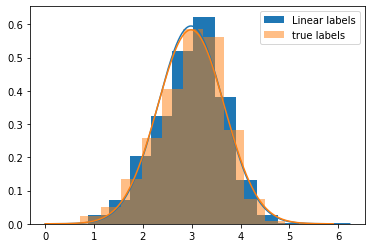

Conv mean:  2.992 || Standard dev:  0.657
true mean:  2.986 || Standard dev:  0.683


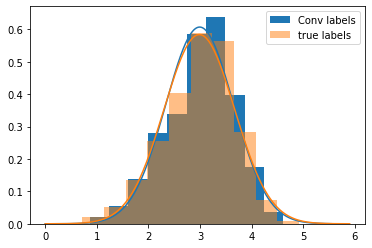

LSTM mean:  2.986 || Standard dev:  0.661
true mean:  2.986 || Standard dev:  0.683


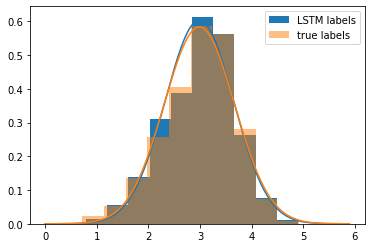

In [66]:
# lets look at the histogram of labels for each network on the test set
labels_hist(net_lin(Xte_usa).detach().cpu().numpy(), 'Linear')
labels_hist(ytest_usa*conversion_constant, 'true', alpha=0.5)
plt.show()

labels_hist(net_conv(Xte_usa).detach().cpu().numpy(), 'Conv')
labels_hist(ytest_usa*conversion_constant, 'true', alpha=0.5)
plt.show()

labels_hist(net_lstm(Xte_usa).detach().cpu().numpy(), 'LSTM')
labels_hist(ytest_usa*conversion_constant, 'true', alpha=0.5)
plt.show()

**Argentina**

In [23]:
# we load the test data
Xtest_arg = np.load(os.path.join(data_dir,'argentina', 'test_hists.npz'), allow_pickle=True)['data']
ytest_arg = np.load(os.path.join(data_dir, 'argentina', 'test_yields.npz'), allow_pickle=True)['data']
Xte_arg, yte_arg = torch.Tensor(Xtest_arg).to(device), (torch.Tensor(ytest_arg)).to(device)

# testing each model
lin_test_arg = test_model(net_lin, Xte_arg, yte_arg)
conv_test_arg = test_model(net_conv, Xte_arg, yte_arg)
lstm_test_arg = test_model(net_lstm, Xte_arg, yte_arg)

print('Linear network test RMSE %.4f || Convolutional network test RMSE %.4f || LSTM network test RMSE %.4f'% (lin_test_arg, conv_test_arg, lstm_test_arg))

Linear network test RMSE 1.2579 || Convolutional network test RMSE 1.0484 || LSTM network test RMSE 1.1586


Epoch 0, train loss = 8.6050e-02
Epoch 10, train loss = 2.8499e-03
Epoch 20, train loss = 1.2422e-03
Epoch 30, train loss = 8.4868e-05
Epoch 40, train loss = 2.7602e-05
Epoch 50, train loss = 2.2157e-05
Epoch 60, train loss = 1.7542e-05
Epoch 70, train loss = 1.6661e-05
Epoch 80, train loss = 1.5648e-05
Epoch 90, train loss = 1.5489e-05


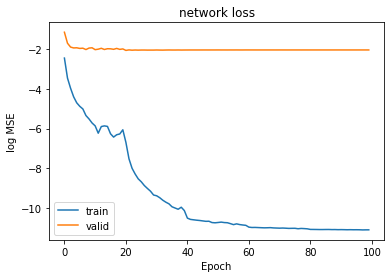

Time: 0.38 mins
Training RMSE: 0.0039 || Validation RMSE: 0.3599
Test RMSE:  0.3667


In [24]:
# we retrain on the training data from argentina to see if we do better
Xtra_arg = np.load(os.path.join(data_dir,'argentina', 'train_hists.npz'), allow_pickle=True)['data']
ytra_arg = np.load(os.path.join(data_dir, 'argentina','train_yields.npz'), allow_pickle=True)['data']
Xtr_arg, ytr_arg = torch.Tensor(Xtra_arg).to(device), (torch.Tensor(ytra_arg)).to(device)

Xval_arg = np.load(os.path.join(data_dir,'argentina', 'dev_hists.npz'), allow_pickle=True)['data']
yval_arg = np.load(os.path.join(data_dir, 'argentina','dev_yields.npz'), allow_pickle=True)['data']
Xv_arg, yv_arg = torch.Tensor(Xval_arg).to(device), (torch.Tensor(yval_arg)).to(device)

# we copy the network
transfer_arg = copy.deepcopy(net_conv)

targ, varg = train_model(transfer_arg, 100, Xtr_arg, ytr_arg, Xv_arg, yv_arg)
print('Test RMSE: ', round(test_model(transfer_arg, Xte_arg, yte_arg), 4))

**Brazil**

In [25]:
# Same for Brazil
Xtest_bra = np.load(os.path.join(data_dir,'brazil', 'test_hists.npz'), allow_pickle=True)['data']
ytest_bra = np.load(os.path.join(data_dir, 'brazil','test_yields.npz'), allow_pickle=True)['data']
Xte_bra, yte_bra = torch.Tensor(Xtest_bra).to(device), (torch.Tensor(ytest_bra)).to(device)

# tesing each network
lin_test_bra = test_model(net_lin, Xte_bra, yte_bra)
conv_test_bra = test_model(net_conv, Xte_bra, yte_bra)
lstm_test_bra = test_model(net_lstm, Xte_bra, yte_bra)
                                                        
print('Linear network test RMSE %.4f || Convolutional network test RMSE %.4f || LSTM network test RMSE %.4f'% (lin_test_bra, conv_test_bra, lstm_test_bra))

Linear network test RMSE 0.9234 || Convolutional network test RMSE 0.7389 || LSTM network test RMSE 0.8368


Epoch 0, train loss = 1.4944e-02
Epoch 10, train loss = 2.1018e-04
Epoch 20, train loss = 6.6102e-05
Epoch 30, train loss = 1.3845e-06
Epoch 40, train loss = 3.3355e-07
Epoch 50, train loss = 2.4236e-07
Epoch 60, train loss = 1.8976e-07
Epoch 70, train loss = 1.7092e-07
Epoch 80, train loss = 1.5879e-07
Epoch 90, train loss = 1.5541e-07


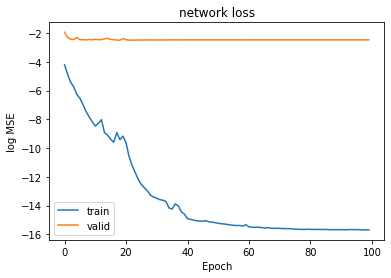

Time: 0.10 mins
Training RMSE: 0.0004 || Validation RMSE: 0.2908
Test RMSE:  0.3422


In [26]:
# we retrain on the training data from brazil to see if we do better
Xtra_bra = np.load(os.path.join(data_dir,'brazil', 'train_hists.npz'), allow_pickle=True)['data']
ytra_bra = np.load(os.path.join(data_dir, 'brazil','train_yields.npz'), allow_pickle=True)['data']
Xtr_bra, ytr_bra = torch.Tensor(Xtra_bra).to(device), (torch.Tensor(ytra_bra)).to(device)

Xval_bra = np.load(os.path.join(data_dir,'brazil', 'dev_hists.npz'), allow_pickle=True)['data']
yval_bra = np.load(os.path.join(data_dir, 'brazil','dev_yields.npz'), allow_pickle=True)['data']
Xv_bra, yv_bra = torch.Tensor(Xval_bra).to(device), (torch.Tensor(yval_bra)).to(device)

# we copy the network
transfer_bra = copy.deepcopy(net_conv)

tbra, vbra = train_model(transfer_bra, 100, Xtr_bra, ytr_bra, Xv_bra, yv_bra)
print('Test RMSE: ', round(test_model(transfer_bra, Xte_bra, yte_bra), 4))

| Model / Test RMSE |  USA | Argentina | Brazil |
| --- | --- | --- | --- | 
| You et al.|  0.37 | n/a | n/a | 
| Wang et al. | n/a | n/a | 0.42 |
| Conv (untuned) | **0.3037** | 1.084 | 0.7389 | 
| Conv (tuned) | n/a | **0.3667** | **0.3422** |
| Linear (untuned) | 0.3136 | 1.258 | 0.923 |
| LSTM (untuned) | 0.3285 |  1.159 | 0.837 |
| Ensemble | 0.3056 | n/a | n/a |

We present our results in the table above: no tuning was done on the other networks and for the ensemble method for the other countries as their test loss is worse than for the convolutional network. We also notice that retraining the models on the South American data is very fast (there is less of it). Lastly, we note that after the convolutional network, the lstm network performs better on the other countries than the linear model despite the linear one performing better in test in the USA.

<span style='color:red'> **[Your insights go here. To be completed by you]** </span>

**All 4 models perform better than the benchmark test RMSE set by You et al. (2016) which was 0.37 t/h, here we perform around 0.31 t/h RMSE. Specifically with the convolutional we get a performance of 0.3037 t/h test RMSE**

We can see on the loss curves, the obvious jumps when the scheduler changes the learning rate every 20 epochs. Especially for the convolutional network, we see that it helps the convergence of the loss enormously. Due to the very small batches, the loss-parameter space is most likely very noisy which requires a scheduler to be able to settle in a minima in a short amount of epochs (here we use a scheduler that reduces the learning rate by 80% every 20 epochs).

This state-of-the-art performance is attributable to GPU processing, very small batching (20 for 5792) and a learning rate scheduler as all the networks have this in common and all perform better than You et al. These components were all made easy to implement by Pytorch's various utilities and fast to run with GPU. We can create very dense and deep architectures quickly and train them in under a couple minutes (longer for LSTM due to no paralellisation).  

Initially, it was believed that a mistake must have been made somewhere in the conversion of units as the RMSE was too good even for the linear model, which we expected to be quite poor. But this was double-checked by training the model on the unconverted labels of the USA data and RMSEs of approximately 4.8 bushels/acre were obtained which indeed beat You et al.'s 5.5 bushels/acre mentioned in their paper. 

The ensemble method was not particularly inciteful, as all it ended up doing is assigning a weight of 1 to the convolutional network prediction and close to 0 for the others, it performs worse on the test set than the convolutional model on its own.

To show that the novel technique here is the very small batch size, we retrained the model below with a larger batch size: we obtain a much worse training error and test error. Decreasing batch size, increases training time significantly but improves the test error. 


**Changing batch size**

Epoch 0, train loss = 6.1249e+00
Epoch 20, train loss = 1.8828e-01
Epoch 40, train loss = 1.4183e-01
Epoch 60, train loss = 1.3491e-01
Epoch 80, train loss = 1.3301e-01
Epoch 100, train loss = 1.3272e-01
Epoch 120, train loss = 1.3266e-01
Epoch 140, train loss = 1.3264e-01
Epoch 160, train loss = 1.3264e-01
Epoch 180, train loss = 1.3264e-01


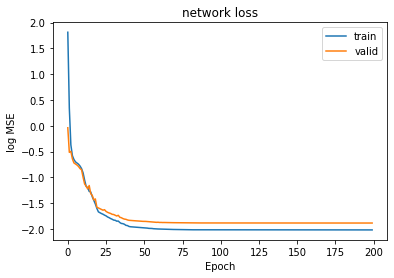

Time: 0.39 mins
Training RMSE: 0.3642 || Validation RMSE: 0.3893
Test RMSE:  0.3883


In [27]:
# we initialise our network
net_conv_batch = convnet().to(device)
epochs = 200
# we train with 500 datapoints per batch on usa data
t_conv1, v_conv1 = train_model(net_conv_batch, epochs, Xtr, ytr, Xv, yv, batchs=500)

# testing on usa data
print('Test RMSE: ' , round(test_model(net_conv_batch, Xte_usa, yte_usa), 4))

Epoch 0, train loss = 5.3767e-01
Epoch 20, train loss = 1.0941e-02
Epoch 40, train loss = 5.8178e-04
Epoch 60, train loss = 4.1827e-05
Epoch 80, train loss = 1.3220e-05
Epoch 100, train loss = 1.0700e-05
Epoch 120, train loss = 1.0220e-05
Epoch 140, train loss = 1.0136e-05
Epoch 160, train loss = 1.0125e-05
Epoch 180, train loss = 1.0136e-05


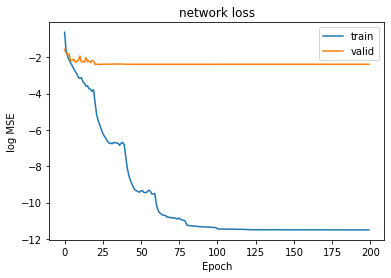

Time: 8.21 mins
Training RMSE: 0.0032 || Validation RMSE: 0.3039
Test RMSE:  0.2893


In [28]:
# we initialise our network
net_conv_batch2= convnet().to(device)
epochs = 200
# we train with 10 datapoints per batch on usa data
t_conv2, v_conv2 = train_model(net_conv_batch2, epochs, Xtr, ytr, Xv, yv, batchs=10)

# testing on usa data
print('Test RMSE: ' , round(test_model(net_conv_batch2, Xte_usa, yte_usa), 4))

| Model | test RMSE |
| --- | --- |
| You et al. | 0.37 |
| 500 per batch | 0.3883 |
| 20 per batch | 0.3037 |
| 10 per batch |0.2893 | 

We do here 2 tests: one with a batch size of 500 and one with a batch size of 10: we show that the test error is much better for a lower batch size. The very small batch size is thus integral to the high performance of the model and this is aided by the fact that we are using GPUs for training. 

We actually obtain a test error of 0.2893 on USA: we do much better than the benchmark set by You et al. which is close to the test error obtained with a batch size of 500: 0.37 $\approx$ 0.3883. 

**Training and testing on all the data**<br> 
Out of interest

torch.Size([7073, 32, 32, 9]) torch.Size([7073])
Epoch 0, train loss = 8.1427e-01
Epoch 20, train loss = 1.4514e-02
Epoch 40, train loss = 1.0391e-03
Epoch 60, train loss = 1.0431e-04
Epoch 80, train loss = 4.7930e-05
Epoch 100, train loss = 4.0417e-05
Epoch 120, train loss = 3.8917e-05
Epoch 140, train loss = 3.8608e-05
Epoch 160, train loss = 3.8557e-05
Epoch 180, train loss = 3.8550e-05


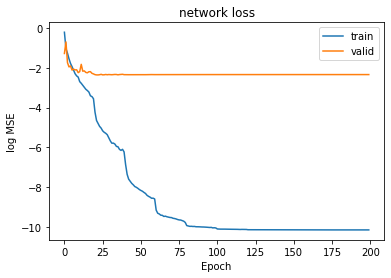

Time: 4.97 mins
Training RMSE: 0.0062 || Validation RMSE: 0.3107
USA Test RMSE:  0.3111
Bra Test RMSE:  0.3578
Arg Test RMSE:  0.3735


In [62]:
# all the training data
all_Xtr = torch.vstack((Xtr, Xtr_arg, Xtr_bra))
all_ytr = torch.hstack((ytr, ytr_arg, ytr_bra))
print(all_Xtr.shape, all_ytr.shape)

# initialise model, train and test
conv_net_alldata = convnet().to(device)
t, v = train_model(conv_net_alldata, 200, all_Xtr, all_ytr, Xv, yv)


print('USA Test RMSE: ' , round(test_model(conv_net_alldata, Xte_usa, yte_usa), 4))
print('Bra Test RMSE: ' , round(test_model(conv_net_alldata, Xte_bra, yte_bra), 4))
print('Arg Test RMSE: ' , round(test_model(conv_net_alldata, Xte_arg, yte_arg), 4))

Here we see that training on the whole dataset performs worse in testing than on training on USA only and then fine tuning on other country data. For reference, the performance on the other experiments was 0.304, 0.342 and 0.367 respectively which are all better than the results shown above. 

This makes sense as when training on only the USA, we are implicitly training on their weather conditions and farming equipment. And when we fine tune on another dataset, we tune to the conditions of that country. Here, there is a strong USA bias in this dataset as there is 5792/7073 images from USA which will worsen the performance for the other countries. This performance is still better than both Wang et al. and You et al.

### Ethical considerations (15%)

**Guidelines**: Discuss/analyse the ethical dimensions of the application: bias, fairness, interpretability, etc. Some of these may not be relevant, but we leave this for you to decide which ones would be the relevant ones to consider for the problem at hand. Here you could do a sensitivity/interpretability analysis of the model, to study the effect of different variables or examine whether there are any biases. You could also link this part with your exploratory data analysis, focusing on the ethical dimensions of the dataset rather than the model you built. Justify what your analysis tell us about these ethical dimensions. 


<span style='color:red'> **[Your insights go here. To be completed by you]** </span>

Bias: Here, the data is from the USA, Argentina and Brazil, which are ranked 17th, 46th and 84th in IDH respectively (out of 189). This is a pretty good range of IDHs but this model has the most value for developing coutries where local sensing data is not available [1] so we would like to see how this model performs on the least developed countries. 
We can expect the countries in this dataset to have fairly advanced farming equipment (tractors, pesticides, water availability for irrigation...) which affects how good the final yield is. This can be seen in the labels where the average yield is better in the USA than in Argentina or Brazil as it is more developed. Also, all this data is from the American continent, which has a different climate than subsaharan Africa for example. We have two countries in South America that will thus have comparable climates leading to biased data and model. Data from Africa, Europe and Asia would be beneficial to improving this model. Also we would need some extreme yields to make our model more robust: a drought or a fire would be events that would drastically change the yield. We do not seem to have such events in the data (the yields roughly follow a normal distribution) and those are the ones we would most like to predict. 

Fairness: The dataset only includes 3 countries: USA, Argentina and Brazil. As mentioned in [1], the USA already have models to predict their crop yield and so a model trained for this is maybe a bit superfluous. On the other hand, least developed countries do not have the economic backing that the USA have and so benefit from these models much more as local sensing data is difficult and expensive to obtain. We have shown that transfer learning seems very effective for this data. So if we obtained even a small amount of data from the least developed countries then we could make these models cheaply and quickly. These models take very little time to train (5-15mins) and we obtain RMSEs that are on average in the range of half a standard deviation of the yield distribution ($0.304\approx 0.5\times0.687$). 

Interpretability: we can see that (in general) linear networks or LSTMs do not work as well as the convolutional network. This means that the patterns of evolution of the histograms: how the pixels change from timestep to timestep is more important than the distribution itself. This shows that changes in colour of the crops are a significant feature for crop yield. This is valuable information where local sensing data is not available. 
Apart from this, the histograms are very removed from the real world in terms of visualisation. Therefore, it is hard to interpret what features are important for the neural network to learn. Apart from the colour evolution, there is little to no obvious interpretability here, which means that it would take a much more in depth analysis to determine the important features for crop yields. Knowing what these features are, could help us understand better how to guarantee high yields and so increase food production and reduce the chance of a famine. 

### Sustainable development relevance & impact (15%)

**Guidelines**: Discuss what are the current challenges surrounding this dataset in terms of sustainable development and how can ML help overcome them? Additionally, bring out all of the things you have managed to do and understand from the experiments and connect them to sustainable development. Discuss what are the challenges of deploying such a model and how it could impact our progress towards achieving the sustainable development goals. 


<span style='color:red'> **[To be completed by you]** </span>



Developing and using these models require data and a bit of Machine Learning knowledge: training them is relatively fast. This means that the challenges is enabling small producers to have access to these technologies. If only large Multi-national firms have access to it then this would put them at an advantage over small producers as they can predict their production in advance to optimise supply chain logistics. As the larger companies decrease their prices thanks to optimising their supply chain, this could put smaller farmers in danger of losing their market share and consequently their livelihood. Making these models open-source and obtaining data from different countries are therefore the challenges of this model. 

On the data side: remote sensing data is widely available and can be obtained relatively cheaply (You et al. 2016). There is no particular hurdle to obtaining satellite data from the least developed countries. On the other hand, making the most advanced models open-source would be a challenge. What is more likely to happen are institutions and large companies that keep their model to themselves and do not share it. This could then exacerbate inequalities between small farmers and these more powerful entities where the latter have the advantage to predict their supply putting the former in danger of losing their business.

Practically if a farmer would want to use this model, it is not guaranteed that they would know how to use these tools to their advantage. For example, it would seem a tall order for an independent farmer in Sub-Saharan Africa to browse github for models to predict their crop yield. There are two solutions: the first would be to educate people on AI and computer science which would be the best solution but is very difficult to accomplish even in developed countries. A better, faster and more efficient way would be a company or an NGO that creates a platform where small producers can enter the geolocation of their land to then get a prediction for their crop yield. This can then open the door for competition to drive down prices and increase performance but could also lead to a single company having the monopoly of these models and charging consumers a lot of money for a prediction. 

As remote sensing data becomes more readily available throughout the year in least developed countries, these types of models can popularise very quickly: they are very quick to train, require little additional data thanks to their transfer learning capabilities and are relatively simple. While they do not predict with incredible accuracy, they can be a good yardstick of the way a harvest is going that can help policy-makers and farmers for decision-making. In the least developed countries, there is less available money to substitute bad crop yields with food imports. Being able to predict in advance how the yield will turn out will help governments to make preparation for eventual famines. Or on the flip side, the governments, private sector and local producers can start preparing logistics for exports if the yield is looking very promising so there is less wasted food and more money earned from a good harvest.

In general though, this model has few downsides except for perhaps exacerbating econnomic inequality (SDG 10) through companies abusing their access to experts who create the models. It mostly seems beneficial for SDG 1 (no hunger) and could help to reduce hunger if effectively deployed to local communities in least developed countries where it would have the most impact. It also affects SDG 8 (economic growth) and SDG 11 (sustainable communities) as predicting a good yield before it happens leads to more exports and less wasted food. It does have the downside of not having very good accuracy, where we get on average 11% error with the convolutional model. If this model was deployed (such as on a privately owned platform), this error would need to be effectively communicated to the consumer (farmers) to help them make the correct logistical decisions, a model that could output the uncertainty of the model such as a BNN would then be a good extension. We also note, that there is room for improvement in these models as with the batch size tuning example. We can expect performance to increase with hyperparameter tuning.

### References
[1] Deep Gaussian Process for Crop Yield Prediction Based on Remote Sensing Data, You et al.
(2016)<br>
[2] Deep Transfer Learning for Crop Yield Prediction with Remote
Sensing Data, Wang et al. (2018) <br>
[2] https://sustainlab-group.github.io/sustainbench/leaderboard/